<a href="https://colab.research.google.com/github/vgorbikov/infotransfer_labs/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

В соответствии с заданным законом распределения сгенерировать выборку размером 104, оценить плотность вероятности с помощью непараметрических методов: гистограммы и ядерной оценки плотности. Для сравнения на один график нанести аналитическую зависимость и получившиеся оценки.

### Вариант 8

Логнормальное распределение:
$f_X(x; \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{-(\ln x-\mu)^2}{2\sigma^2}}$

c параметрами $\mu = 0$ и $\sigma = 0.25$

## Теоретическая справка

Пусть $(x_1,x_2,…,x_n)$ является одномерной выборкой независимых одинаково распределённых величин, извлечённых из некоторого распределения с неизвестной плотностью $f$. Наша задача заключается в оценке формы функции $f$. Её ядерный оценщик плотности равен:

$$
\hat f_h(x)=\frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-x_i}{h})
$$

где $K$ - ядро, т.е неотрицательная функция, \
$h>0$ - сглаживающий параметр, т.н ширина полосы.

К примеру, стандартное нормальное ядро имеет вид: \

$$
K(x)=\frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})
$$

Выбор параметра $h$ важен - это можно сделать на глаз, но одним из вариантов его нахождения при использовании нормального ядра является эмпирическое правило:\
$$
h=(\frac{4\hat \sigma^5}{3n})^\frac{1}{5}
$$

где $\hat \sigma$ - среднеквадратичное отклонение выборки.

## Решение

In [2]:
from typing import Callable
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import scipy as sc

In [28]:
# параметры распределения
MU = 0
SIGMA = 0.25
VOLUME = 104

# выборка
values = np.random.lognormal(MU, SIGMA, VOLUME)

# среднеквадратичное отклонение выборки
emp_sigma = sc.ndimage.standard_deviation(values)
# полоса пропускания найденная по эмпирическому правилу
emp_h = (4*emp_sigma**5/(3*len(values)))**(1/5)

print(f'Полоса пропускания: {round(emp_h, 3)}')

Полоса пропускания: 0.105


In [29]:
# точки для постороения аналитической кривой
xs = list(np.arange(0, 3, 0.01))
ys_an = list(st.lognorm.pdf(xs, SIGMA, MU))

In [25]:
class CoreEst():
  """
  Класс для создания ядерного оценщика плотности распределения
  """
  def __init__(self, core: Callable[[float], float]) -> None:
    self.core = core

  def estimation_gen(self, xs: list[float], h: float) -> Callable[[float], float]:
    """
    Метод для создания функции-оценщика по элементам выборки
    """
    n = len(xs)

    def est_xi(x: float) -> float:
      return 1/(n*h)*np.sum([self.core((x - x_i)/h) for x_i in xs])

    return est_xi


def norm_core(x: float) -> float:
  """
  Стандартное нормальное ядро
  """
  return 1/(np.sqrt(2*np.pi))*np.exp(-1*x**2/2)

In [30]:
# создаём предсказатель по данным исследуемой выборки
estimator = CoreEst(norm_core).estimation_gen(values, emp_h)

# находим с его помощью точки для построения оценочной кривой плотности распределения
ys_kde = [estimator(xi) for xi in xs]

# для сравнения посмотрим что даст метод, реализованный в scipy
kernl = st.gaussian_kde(values)
ys_kde_scpy = [kernl(xi) for xi in xs]

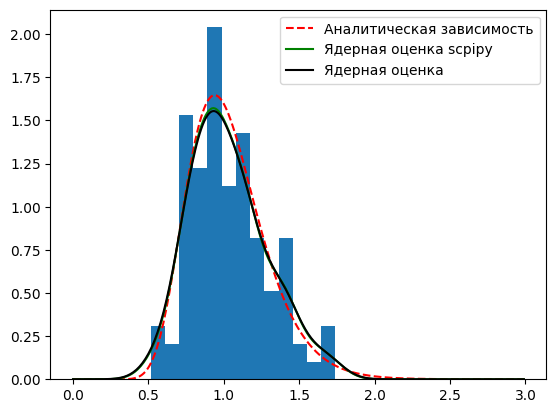

In [31]:
fig, ax = plt.subplots(1, 1)

# гистограмма для оценки плотности вероятностей
ax.hist(values, density=True, bins=13)

# отрисовка вычисленных кривых
ax.plot(xs, ys_an, label='Аналитическая зависимость', color='r', linestyle='--')
ax.plot(xs, ys_kde_scpy, label='Ядерная оценка scpipy', color='g')
ax.plot(xs, ys_kde, label='Ядерная оценка', color='black')

plt.legend()
plt.show()